### Task: Determine the eligibility for granting a Home Loan
Objective of this notebook is:

1.   To understand the patterns in the data.
2.   How to Handle the categorical features.
3. How to deal with missing data.
4. Feature Engineering
5. Finding the most important features while taking the decision of granting a loan application.
6. Understanding the Normalization and standardisation of the data.

#### Load the data

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Basic data exploration

In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data.describe(include = ['object'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [9]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [10]:
data.isna().sum() / data.shape[0] * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [11]:
## separate categorical and numeric features.
# catgeorical and numerical columns
cat_cols = data.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols.remove('Loan_Status')
cat_cols.append('Credit_History')
cat_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Credit_History']

In [12]:
num_cols = data.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
num_cols.remove('Credit_History')
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

#### Univariate Data Analysis

In [13]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [14]:
# Prediction target
data["Loan_Status"].value_counts() / 614 * 100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

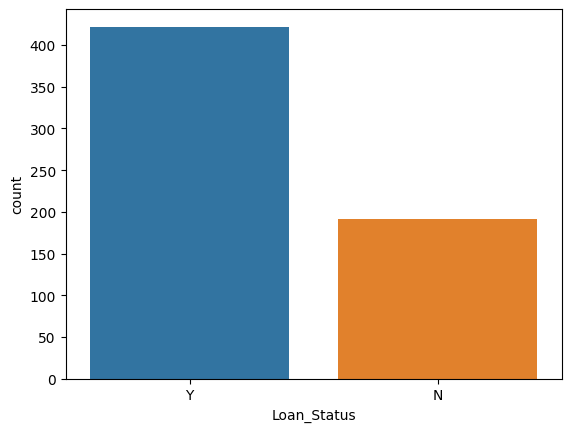

In [15]:
sns.countplot(data=data, x='Loan_Status')
plt.show()

<Axes: >

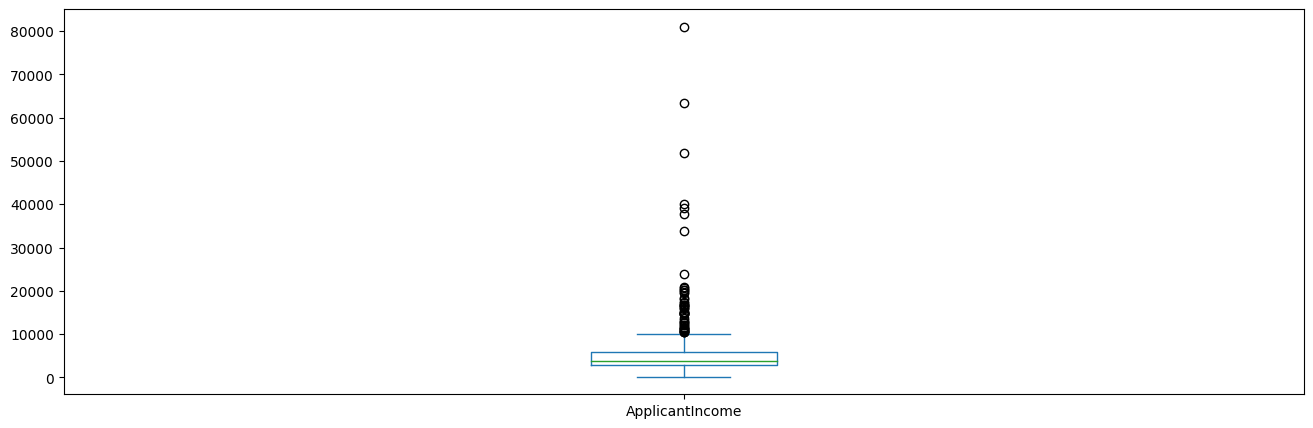

In [16]:
plt.figure()
data["ApplicantIncome"].plot.box(figsize=(16, 5))

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

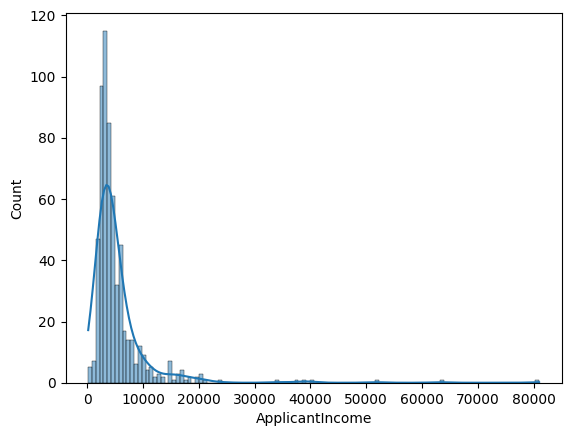

In [17]:
sns.histplot(data["ApplicantIncome"], kde=True)

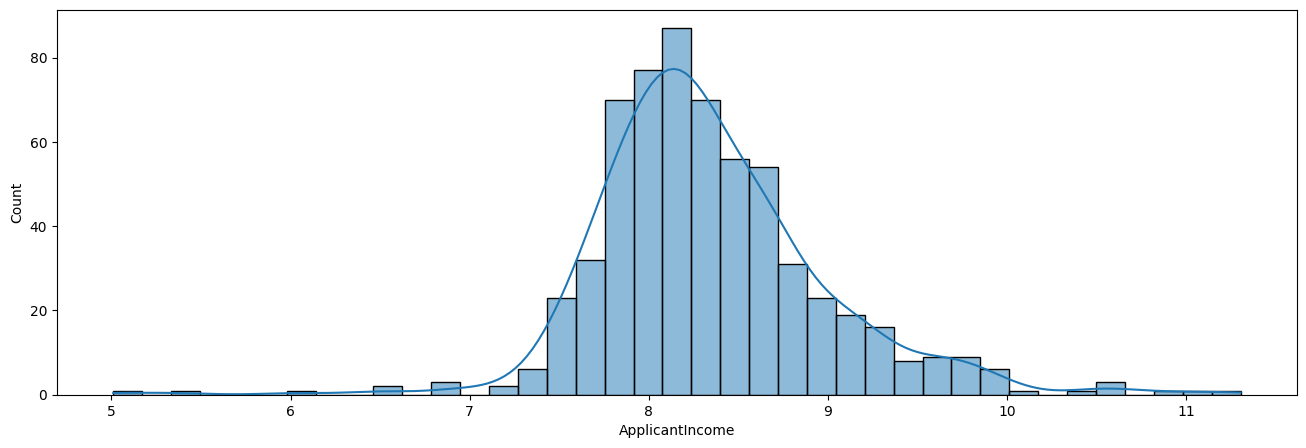

In [18]:
plt.figure(figsize=(16, 5))
sns.histplot(np.log(data["ApplicantIncome"]), kde=True)

plt.show()

In [19]:
# H0: The distribution is Gaussian
# Ha: The distribution is not Gaussian
from scipy.stats import kstest, norm

log_app_inc = np.log(data["ApplicantIncome"])

z_lai = (log_app_inc - log_app_inc.mean())/log_app_inc.std()

kstest(z_lai, norm.cdf)

KstestResult(statistic=0.08360472600316649, pvalue=0.0003504196051879084, statistic_location=0.19584194038098854, statistic_sign=1)

<Axes: >

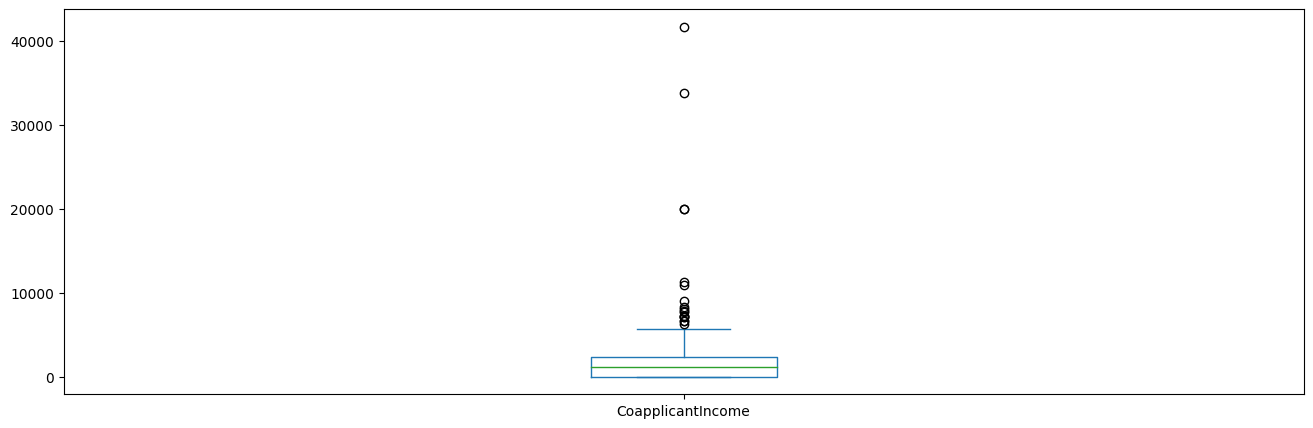

In [20]:
## CoapplicantIncome
plt.figure()
data["CoapplicantIncome"].plot.box(figsize=(16, 5))

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

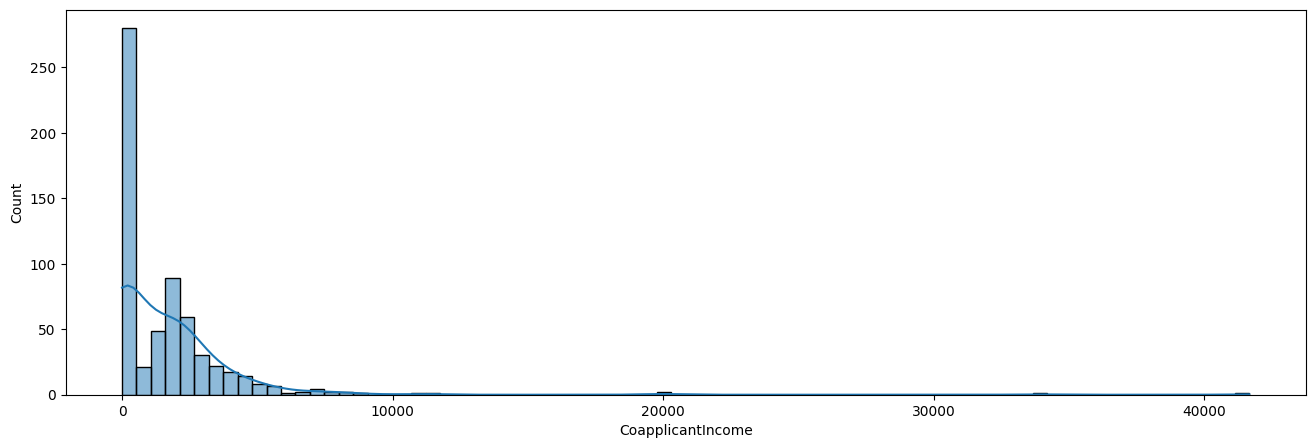

In [21]:
plt.figure(figsize=(16, 5))
sns.histplot(data["CoapplicantIncome"], kde=True)

In [22]:
data.groupby("Loan_Status").mean()['ApplicantIncome']

/tmp/ipykernel_1644/2136516450.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Loan_Status").mean()['ApplicantIncome']


Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

/tmp/ipykernel_1644/508281634.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Loan_Status").mean()['ApplicantIncome'].plot.bar()


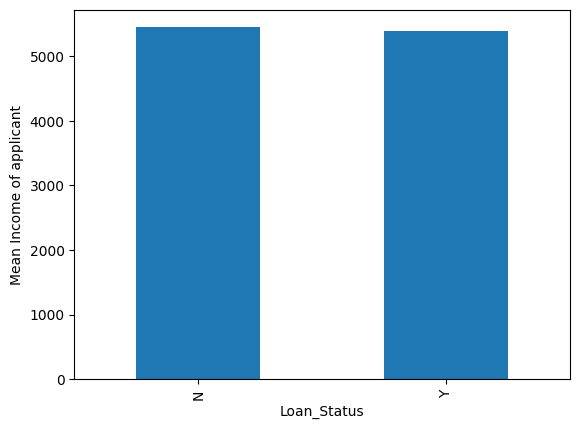

In [23]:
data.groupby("Loan_Status").mean()['ApplicantIncome'].plot.bar()
plt.ylabel("Mean Income of applicant")
plt.show()

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

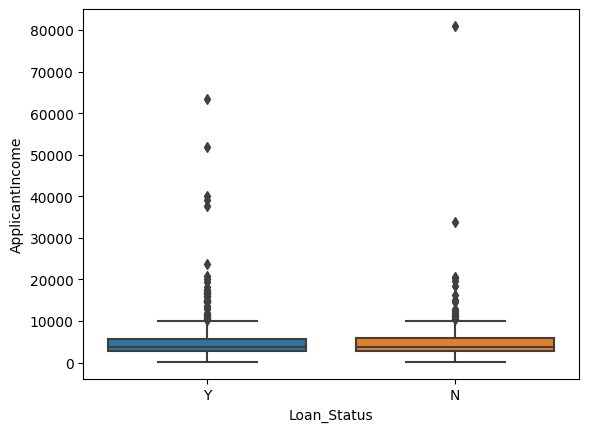

In [24]:
## Box plots
yes = data[data["Loan_Status"]=="Y"]
no  = data[data["Loan_Status"]=="N"]

plt.figure()
sns.boxplot(data=data, x="Loan_Status", y="ApplicantIncome")

In [25]:
from scipy.stats import ttest_ind

ttest_ind(yes["ApplicantIncome"], no["ApplicantIncome"])

Ttest_indResult(statistic=-0.11650844828724542, pvalue=0.907287812130518)

#### Bin Income

In [26]:
bins=[0, 2500, 4000, 6000, 8000, 10000, 81000]
group=['Low','Average','medium', 'h1', 'h2', 'Very high']

In [27]:
data['Income_bin'] = pd.cut(data['ApplicantIncome'],bins,labels=group)

In [28]:
pd.crosstab(data["Income_bin"],data["Loan_Status"], margins=True)

Loan_Status,N,Y,All
Income_bin,,,
Low,34,74,108
Average,67,159,226
medium,45,98,143
h1,20,34,54
h2,9,22,31
Very high,17,35,52
All,192,422,614


In [29]:
## H0: Variables are indepenbdent
## Ha: Variables are dependent
from scipy.stats import chi2_contingency

val = pd.crosstab(index=data["Income_bin"], columns=data["Loan_Status"]).values
print(val)
chi2_contingency(val) # chi_stat, p_value, df, expected_values

[[ 34  74]
 [ 67 159]
 [ 45  98]
 [ 20  34]
 [  9  22]
 [ 17  35]]


Chi2ContingencyResult(statistic=1.2390175474316056, pvalue=0.941079844721327, dof=5, expected_freq=array([[ 33.77198697,  74.22801303],
       [ 70.67100977, 155.32899023],
       [ 44.71661238,  98.28338762],
       [ 16.88599349,  37.11400651],
       [  9.69381107,  21.30618893],
       [ 16.26058632,  35.73941368]]))

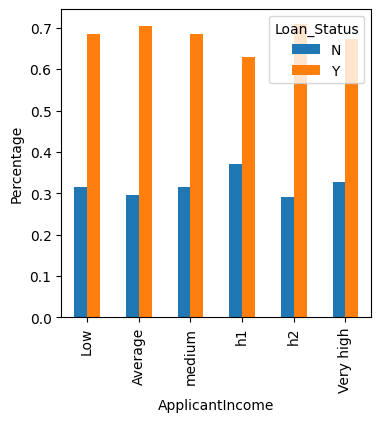

In [30]:
Income_bin = pd.crosstab(data["Income_bin"],data["Loan_Status"])

Income_bin.div(Income_bin.sum(axis=1),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [31]:
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium,6000.0


In [32]:
bins = [0,3000,5000,8000,81000]
group = ['Low','Average','High','Very High']
data["TotalIncome_bin"] = pd.cut(data["TotalIncome"],bins,labels=group)

In [33]:
vals = pd.crosstab(data["TotalIncome_bin"], data["Loan_Status"])
vals

Loan_Status,N,Y
TotalIncome_bin,,
Low,20,27
Average,69,154
High,61,151
Very High,42,90


In [34]:
## H0: Variables are independent
## Ha: Variables are dependent
chi2_contingency(vals) # chi_stat, p-value, dof, expec

Chi2ContingencyResult(statistic=3.428480885250809, pvalue=0.3301570564076713, dof=3, expected_freq=array([[ 14.6970684 ,  32.3029316 ],
       [ 69.73289902, 153.26710098],
       [ 66.29315961, 145.70684039],
       [ 41.27687296,  90.72312704]]))

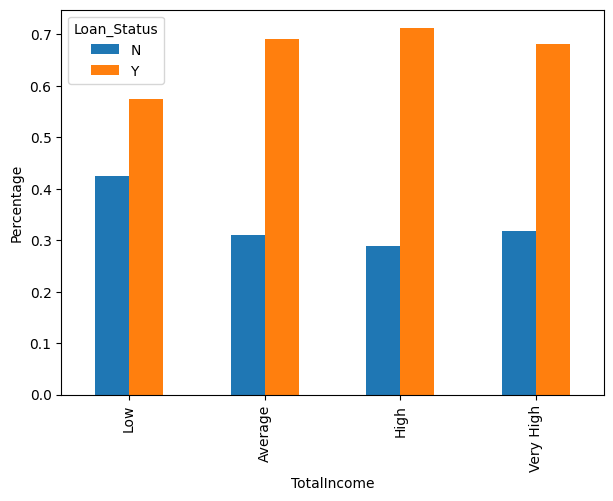

In [35]:
TotalIncome = pd.crosstab(data["TotalIncome_bin"],data["Loan_Status"])
TotalIncome.div(TotalIncome.sum(axis = 1),axis=0).plot(kind='bar', figsize=(7,5))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

#### Loan Amount and Loan Term

In [36]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [37]:
data['Loan_Amount_Term'] = (data['Loan_Amount_Term']/12).astype('float')

In [38]:
data['Loan_Amount_Term'].value_counts()

30.0    512
15.0     44
40.0     15
25.0     13
20.0      4
7.0       4
10.0      3
5.0       2
3.0       2
1.0       1
Name: Loan_Amount_Term, dtype: int64

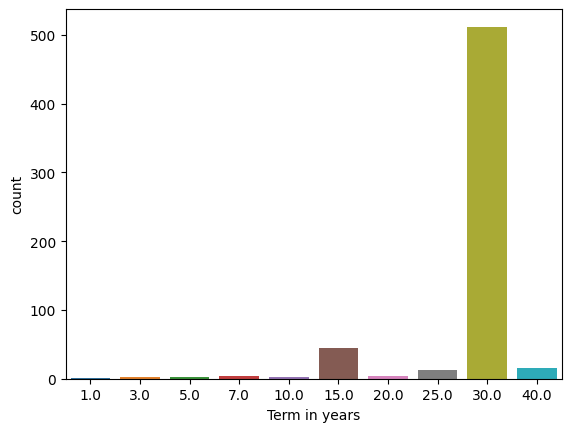

In [39]:
sns.countplot(x='Loan_Amount_Term', data=data)
plt.xlabel("Term in years")
plt.show()

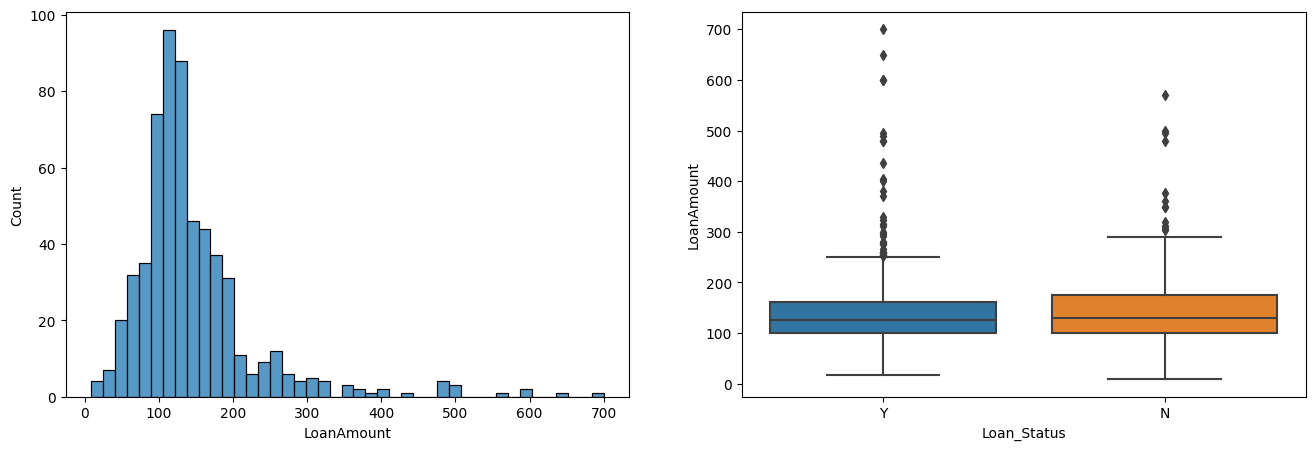

In [40]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.histplot(data['LoanAmount']);

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y = 'LoanAmount')

plt.show()

In [41]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,High


In [42]:
data.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [43]:
data['Loan_Status'] = data['Loan_Status'].map({"Y": 1, 'N': 0})

In [44]:
data['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [45]:
def null_checker(p):
    if p<0.05:
        print("Reject the null hypothesis")
    else:
        print("Failed to Reject the null hypothesis")

#### A3.

In [75]:
np.mean(gum_data)

0.6262626262626263

In [ ]:
np.mean(gum_data)

ValueError: All arrays must be of the same length

In [78]:
data['NewVar'] = ''

In [79]:
data.loc[(data['Gender'] == 'Male') & (data['Married'] == 'No') & (data['Education'] == 'Graduate'), "NewVar"] = 'C1'
data.loc[(data['Gender'] == 'Female') & (data['Education'] == 'Graduate'), "NewVar"] = 'C2'



In [81]:
data1 = data.loc[data['NewVar'] != '', :]

In [82]:
#  graduate unmarried men are more likely to get a loan than graduate women
# H0: Both categorical variables are independent of each other 
# H1: Both categorical variables are dependent on each other 

confusion_matrix = pd.crosstab(data1['NewVar'], data1['Loan_Status'])

statistic, p = stats.chi2_contingency(confusion_matrix)[:2]
null_checker(p)
print(statistic, round(p,4))

Failed to Reject the null hypothesis
0.14381605008456969 0.7045


In [85]:
data.Credit_History.unique()

array([ 1.,  0., nan])

In [46]:
#  graduate unmarried men are more likely to get a loan than graduate women
# H0: All groups are equally likely to get loan ( mu (gum) = mu (gm))
# H1: All groups are not qually likely to get loan ( mu (gum) > mu (gm))

g_data = data.loc[data['Education'] == 'Graduate', :]

gum_data = g_data.loc[(g_data['Gender'] == 'Male') & (g_data['Married'] == 'No'), "Loan_Status"].to_list()

gm_data = g_data.loc[g_data['Gender'] == 'Female', "Loan_Status"].to_list()

stat, p = stats.ttest_ind(gum_data, gm_data, alternative= 'greater')

null_checker(p)

print(stats, p)


Failed to Reject the null hypothesis
-0.5280527595240861 0.700958923536519


#### A4.

In [66]:
data1 = data.dropna().reset_index(drop=True)

In [67]:
data1['NewFeature'] = (data1["ApplicantIncome"]) + (3 * data1["LoanAmount"]) + (7000 * data1["Credit_History"])

In [68]:
data1['Sepearator'] = data1['NewFeature']>data1['NewFeature'].mean()*0.25

In [73]:
import scipy.stats as stats

# H0 : the variables are independent, there is no relationship between the two categorical variables.
# Ha : the variables are dependent, there is a relationship between the two categorical variables.
confusion_matrix = pd.crosstab(data1['Sepearator'], data1['Loan_Status'])

statistic, p = stats.chi2_contingency(confusion_matrix)[:2]
null_checker(p)
print(statistic, round(p,4))

# Hence, there is a relationship between the two categorical variables.

Reject the null hypothesis
15.62341983693342 0.0001


In [71]:
import scipy.stats as stats

# H0 : the variables are independent, there is no relationship between the two categorical variables.
# H0 : the variables are dependent, there is a relationship between the two categorical variables.
confusion_matrix = pd.crosstab(data1['Sepearator'], data1['NewFeature'])

statistic, p = stats.chi2_contingency(confusion_matrix)[:2]
null_checker(p)
print(statistic, p)

# Hence, there is no relationship between the two categorical variables.

Failed to Reject the null hypothesis
480.00000000000006 0.31708806667527056


In [72]:
import scipy.stats as stats

# H0 : the variables are independent, there is no relationship between the two categorical variables.
# H0 : the variables are dependent, there is a relationship between the two categorical variables.
confusion_matrix = pd.crosstab(data1['NewFeature'], data1['Loan_Status'])

statistic, p = stats.chi2_contingency(confusion_matrix)[:2]
null_checker(p)
print(statistic, p)

# Hence, there is no relationship between the two categorical variables.

Failed to Reject the null hypothesis
470.62194724845324 0.43143540125194363


In [51]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,NewFeature
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,1,medium,5849.0,High,12849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,0,medium,6091.0,High,11967.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,1,Average,3000.0,Low,10198.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,1,Average,4941.0,Average,9943.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,1,medium,6000.0,High,13423.0


In [ ]:
#  graduate unmarried men are more likely to get a loan than graduate women
# H0: All groups are equally likely to get loan ( mu (gum) = mu (gm))
# H1: All groups are not qually likely to get loan ( mu (gum) > mu (gm))

g_data = data.loc[data['Education'] == 'Graduate', :]

gum_data = g_data.loc[(g_data['Gender'] == 'Male') & (g_data['Married'] == 'No'), "Loan_Status"].to_list()

gm_data = g_data.loc[g_data['Gender'] == 'Female', "Loan_Status"].to_list()

stats, p = stats.ttest_ind(gum_data, gm_data, alternative= 'greater')

null_checker(p)

print(stats, p)


In [47]:
(data['LoanAmount']*1.08*100/data['Loan_Amount_Term'])/data['TotalIncome']

0           NaN
1      0.075653
2      0.079200
3      0.087432
4      0.084600
         ...   
609    0.088138
610    0.070141
611    0.109577
612    0.088778
613    0.104473
Length: 614, dtype: float64

#### Homework
Think of ability to pay EMI as a feature, and come up with the right feature engineering to get a better relation with target (Loan Status)

Use loan amount, loan term, income, guess expense, finally ability to pay EMI.

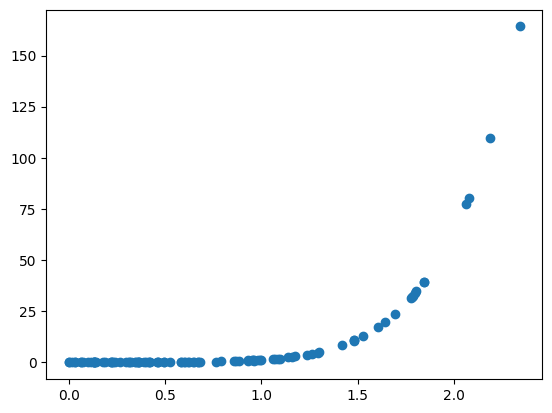

In [44]:
a = np.abs(np.random.normal(size=100))
w = np.random.normal(size=100) * 0.1
b = a**6 + w

plt.scatter(a, b)

In [45]:
from scipy.stats import pearsonr

ra = a.argsort().argsort()
rb = b.argsort().argsort()

print(pearsonr(a,b))
print(pearsonr(ra,rb)) ## Spearman

PearsonRResult(statistic=0.692041945642263, pvalue=1.5442332849382135e-15)
PearsonRResult(statistic=0.868682868286829, pvalue=1.1693628135633974e-31)


### Salil's doubt
10 identical boxes each box has 10 chits numbered from 1-10
Take out chits from every box (with replacement) and note the numbers
n1, n2,… n10. What is the probab that the sum of n1, n2,… n10 divisible by 7

In [46]:
## Sum of 10 uniform random variables
u1 = np.array([0.1]*10)

In [47]:
res = u1
for i in range(9):
    res = np.convolve(res, u1)

In [48]:
res

array([1.00000000e-10, 1.00000000e-09, 5.50000000e-09, 2.20000000e-08,
       7.15000000e-08, 2.00200000e-07, 5.00500000e-07, 1.14400000e-06,
       2.43100000e-06, 4.86200000e-06, 9.23680000e-06, 1.67860000e-05,
       2.93380000e-05, 4.95220000e-05, 8.10040000e-05, 1.28748400e-04,
       1.99292500e-04, 3.01015000e-04, 4.44372500e-04, 6.42070000e-04,
       9.09127000e-04, 1.26280000e-03, 1.72232500e-03, 2.30845000e-03,
       3.04273750e-03, 3.94663060e-03, 5.04029350e-03, 6.34125800e-03,
       7.86293200e-03, 9.61305400e-03, 1.15921972e-02, 1.37924380e-02,
       1.61963065e-02, 1.87761310e-02, 2.14938745e-02, 2.43015388e-02,
       2.71421810e-02, 2.99515480e-02, 3.26602870e-02, 3.51966340e-02,
       3.74894389e-02, 3.94713550e-02, 4.10820025e-02, 4.22709100e-02,
       4.30000450e-02, 4.32457640e-02, 4.30000450e-02, 4.22709100e-02,
       4.10820025e-02, 3.94713550e-02, 3.74894389e-02, 3.51966340e-02,
       3.26602870e-02, 2.99515480e-02, 2.71421810e-02, 2.43015388e-02,
      

In [50]:
# sns.barplot(np.arange(91), res)

In [51]:
sum_list = np.array([14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98])
sum_list = sum_list - 10

In [52]:
sum_list

array([ 4, 11, 18, 25, 32, 39, 46, 53, 60, 67, 74, 81, 88])

In [53]:
p = 0
for k in sum_list:
    p += res[k]
    
print(p)

0.14285720130000013
